In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv

In [2]:
def daylength(dayOfYear, lat):
    """
    Parameters
    ----------
    dayOfYear : int
        The day of the year. 1 corresponds to 1st of January
        and 365 to 31st December (on a non-leap year).
    lat : float
        Latitude of the location in degrees. Positive values
        for north and negative for south.
    Returns
    -------
    d : float
        Daylength in hours.
    """
    latInRad = np.deg2rad(lat)
    declinationOfEarth = 23.45*np.sin(np.deg2rad(360.0*(283.0+dayOfYear)/365.0))
    if -np.tan(latInRad) * np.tan(np.deg2rad(declinationOfEarth)) <= -1.0:
        return 24.0
    elif -np.tan(latInRad) * np.tan(np.deg2rad(declinationOfEarth)) >= 1.0:
        return 0.0
    else:
        hourAngle = np.rad2deg(np.arccos(-np.tan(latInRad) * np.tan(np.deg2rad(declinationOfEarth))))
        return 2.0*hourAngle/15.0

In [3]:
def addDayLen(lat, date_str, weather):
    if len(date_str) == 8:
        date_object = datetime.strptime(date_str, '%d.%m.%y').date()
    else:
        date_object = datetime.strptime(date_str, '%d.%m.%Y').date()
    doy = date_object.timetuple().tm_yday 
    my_lst = weather
    count = 0
    for i in range(-5, 20):
        doy_current = doy + i;
        my_lst.append(daylength(doy_current, lat))
    return my_lst

In [4]:
pogoda_aos_28_04_2022 = []
pogoda_kos_02_05_2017 = []
pogoda_kos_13_05_2022 = []
pogoda_kos_18_05_2016 = []
pogoda_kos_28_04_2016 = []
with open('pogoda/pogoda_aos_28_04_2022.csv', 'r') as f:
    csv_f = csv.reader(f, delimiter=';')
    for row in csv_f:
        for x in row:
            pogoda_aos_28_04_2022.append(float(x))
lat = 46.2523
pogoda_aos_28_04_2022 = addDayLen(lat, "28.04.2022", pogoda_aos_28_04_2022)

with open('pogoda/pogoda_kos_02_05_2017.csv', 'r') as f:
    csv_f = csv.reader(f, delimiter=';')
    for row in csv_f:
        for x in row:
            pogoda_kos_02_05_2017.append(float(x))
lat = 45.2176
pogoda_kos_02_05_2017 = addDayLen(lat, "02.05.2017", pogoda_kos_02_05_2017)

with open('pogoda/pogoda_kos_13_05_2022.csv', 'r') as f:
    csv_f = csv.reader(f, delimiter=';')
    for row in csv_f:
        for x in row:
            pogoda_kos_13_05_2022.append(float(x))
lat = 45.2176
pogoda_kos_13_05_2022 = addDayLen(lat, "13.05.2022", pogoda_kos_13_05_2022)

with open('pogoda/pogoda_kos_18_05_2016.csv', 'r') as f:
    csv_f = csv.reader(f, delimiter=';')
    for row in csv_f:
        for x in row:
            pogoda_kos_18_05_2016.append(float(x))
lat = 45.2176
pogoda_kos_18_05_2016 = addDayLen(lat, "18.05.2016", pogoda_kos_18_05_2016)
            

with open('pogoda/pogoda_kos_28_04_2016.csv', 'r') as f:
    csv_f = csv.reader(f, delimiter=';')
    for row in csv_f:
        for x in row:
            pogoda_kos_28_04_2016.append(float(x))
lat = 45.2176
pogoda_kos_28_04_2016 = addDayLen(lat, "28.04.2016", pogoda_kos_28_04_2016)
            
weather = {"28.04.2022":pogoda_aos_28_04_2022,"02.05.2017":pogoda_kos_02_05_2017,"13.05.22":pogoda_kos_13_05_2022,"18.05.2016":pogoda_kos_18_05_2016,"28.04.2016":pogoda_kos_28_04_2016 }
print(weather["28.04.2022"])

[318.63, 15.76, 6.48, 73.56, 1.23, 327.24, 21.23, 7.3, 68.62, 0.01, 321.38, 23.9, 10.01, 65.0, 0.0, 324.28, 26.56, 11.06, 66.69, 0.04, 328.18, 27.91, 13.26, 59.69, 0.0, 340.94, 26.82, 11.32, 65.38, 0.01, 364.88, 27.93, 13.12, 64.5, 0.71, 354.88, 19.26, 9.62, 72.19, 12.19, 314.7, 21.91, 6.62, 52.38, 0.0, 326.22, 16.58, 8.69, 49.69, 0.02, 307.51, 19.82, 7.44, 50.69, 0.02, 304.39, 22.12, 6.28, 53.12, 0.0, 347.41, 21.94, 10.04, 60.12, 8.25, 349.36, 13.63, 6.03, 63.56, 12.48, 349.43, 18.44, 6.04, 62.88, 16.06, 354.16, 12.14, 8.88, 81.94, 7.2, 358.91, 15.01, 8.35, 80.94, 1.58, 310.38, 18.57, 6.1, 62.5, 0.2, 301.29, 17.55, 3.73, 56.94, 0.0, 311.67, 20.99, 8.16, 59.88, 0.03, 333.89, 24.09, 10.0, 56.69, 0.0, 340.89, 26.85, 13.74, 63.38, 0.02, 345.95, 25.44, 13.58, 64.5, 0.07, 344.74, 23.11, 12.48, 60.62, 0.02, 326.52, 22.41, 10.12, 56.31, 0.01, 13.699956858400673, 13.751646745110584, 13.80300744421641, 13.854024269181147, 13.904682174721485, 13.954965754264524, 14.004859238371905, 14.0543464941

In [5]:
virs = pd.read_csv('virs.csv', delimiter=';')
virs = virs.dropna(axis = 0, how = 'all')

In [6]:
#RegionToIndex= {'IND':0, 'UZB':1, 'MOR':2, 'LEB': 3,'TUR':4}

unique_virs = []
vir_loc_type = virs[['seq_id', 'location','region', 'sybtype']]
for rows in vir_loc_type.itertuples():
    vir = int(rows.seq_id[4:])
    loc = int(rows.location[4:])
    subtype = rows.sybtype
    #region = RegionToIndex[rows.region]
    unique_virs.append([vir,loc,subtype, rows.region])
    #unique_virs.append([vir, rows.region])
   


In [7]:
#regions = [vir[3] for vir in unique_virs]
#print(regions)

#for loc in set(regions):
#    print(f"{loc} : {regions.count(loc)}")

In [8]:
db = []

In [9]:
def addDataToDb(table):
    for record in unique_virs:
        df = table[table.vir == str(record[0])]
        for rows in df.itertuples():
            date_string = rows.date
            rcrd = record + weather[date_string]
            
            try:
                tmp = rows.syds.replace(",", ".")
            except Exception:
                continue
            
            try:
                rcrd.append(float(tmp))
            except Exception:
                continue

            db.append(rcrd)
            print(len(rcrd))

In [10]:
# 

# Начало созревания-полное созревание (дней)


kos_2016 = pd.read_csv('БАЗА_НУТ_ГРАНТ_2016_КОС.csv', delimiter=';')
kos_2016 = kos_2016.rename(columns={"№ каталога ВИР": "vir", \
                                    "Начало всходов-начало цветения (дней)": "time_flower", \
                                    "Дата посева": "date", "Начало всходов- полное созревание (дней)": "syds" })
kos_2017 = pd.read_csv('Вишняковой_база_нут_грант_2017_КОС.csv', delimiter=';')
kos_2017 = kos_2017.rename(columns={"№ каталога ВИР": "vir", "Начало всходов-начало цветения (дней)": "time_flower", \
                                    "Дата посева": "date","Начало всходов- полное созревание (дней)": "syds"   })
kos_2022 = pd.read_csv('НУТ_КОС_2022.csv', delimiter=';')
kos_2022 = kos_2022.rename(columns={"№ каталога ВИР": "vir", "Начало всходов-начало цветения (дней)": "time_flower", \
                                    "Посев": "date", "Dmat (Начало всходов- полное созревание, дней)": "syds"  })

aos_2022 = pd.read_csv('НУТ_ АОС_2022_edit.csv', delimiter=';')
aos_2022 = aos_2022.rename(columns={"№ каталога": "vir", "Начало всходов-начало цветения (дней)": "time_flower", \
                                    "Посев": "date", "Dmat (период начало всходов-полное созревание)": "syds" })



addDataToDb(kos_2016)
addDataToDb(kos_2017)
addDataToDb(kos_2022)
addDataToDb(aos_2022)

155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155


TUR : 43
UZB : 24
LEB : 26
MOR : 31
IND : 26
TUR[22, 22, 23, 23, 27, 27, 29, 29, 33, 33, 34, 34, 35, 35, 35, 35, 35, 35, 38, 38, 85, 85, 85, 85, 86, 86, 127, 127, 128, 128, 162, 162, 170, 170, 188, 188, 247, 247, 247, 249, 249, 252, 252]
desi: 22 kabuli 21
UZB[95, 95, 102, 102, 102, 102, 102, 102, 102, 102, 112, 112, 123, 123, 124, 124, 124, 124, 140, 140, 143, 143, 251, 251]
desi: 18 kabuli 6
LEB[81, 81, 81, 81, 158, 158, 160, 160, 160, 160, 161, 161, 168, 168, 171, 171, 172, 172, 173, 173, 178, 178, 179, 179, 186, 186]
desi: 12 kabuli 14
MOR[80, 80, 144, 144, 145, 150, 150, 156, 156, 193, 193, 201, 201, 203, 203, 205, 205, 206, 206, 207, 207, 208, 208, 208, 208, 209, 209, 216, 216, 219, 219]
desi: 12 kabuli 19
IND[79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 230, 230, 236, 236, 237, 237, 244, 244]
desi: 26 kabuli 0


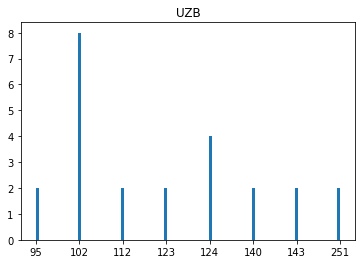

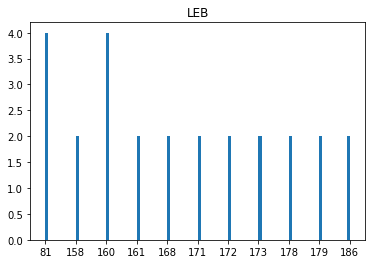

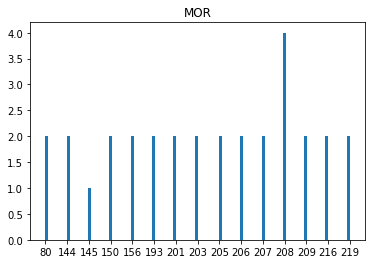

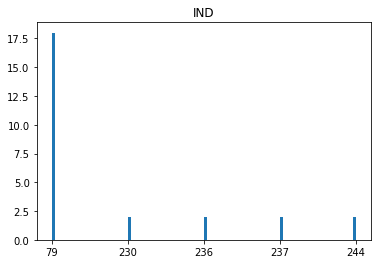

<Figure size 432x288 with 0 Axes>

In [11]:
from matplotlib import pyplot as plt
#print(db[0])
regions = [vir[3] for vir in db]
for loc in set(regions):
    print(f"{loc} : {regions.count(loc)}")
    
for reg in set(regions):
    locs = [vir[1] for vir in db if vir[3]==reg]
    locs.sort()
    plt.hist([str(l) for l in locs],  100)
    plt.title(reg)
    plt.figure(reg)
    print(reg + str(locs))
    dk = [vir[2] for vir in db if vir[3]==reg]
    print("desi:",dk.count('desi'),"kabuli", dk.count('kabuli'))
#for loc in set(locs):
    #print(f"{loc} : {locs.count(loc)}")
    


In [12]:
dic = {
	'ind1':[79], 
	'ind2':[230,236, 237, 244],
	'mor1':[80,144,145,150,156,193, 201,203],
	'mor2':[205,206,207,208,209,216, 219],
	'tur1':[22,23,27,29,33, 34],
	'tur2':[35, 38, 85,86,127],
	'tur3':[128,162,170,188,247,249,252],
	'leb1':[81,158,160, 161,168],
	'leb2':[171,172, 173,178,179,186],
	'uzb1':[95,102,112],
	'uzb2':[123,124,140,143,251]
}

In [13]:
inv_map = {x:k for k, v in dic.items() for x in v}

In [14]:
new_locs = [inv_map[vir[1]] for vir in db]

(array([18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 12.]),
 array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
         0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
         0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
         1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
         1.66666667,  1.75

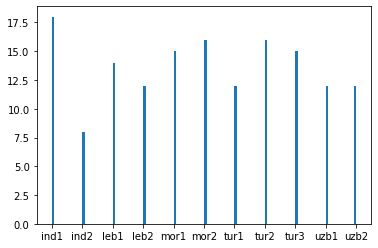

In [15]:
new_locs.sort()
plt.hist(new_locs,120)

In [16]:
#locs = [x[1] for x in db]

#for loc in set(locs):
#    print(f"{loc} : {locs.count(loc)}")
    
#print(db[0])
#regions = [vir[3] for vir in db]
#print(regions)

#for loc in set(regions):
#    print(f"{loc} : {regions.count(loc)}")
#print(db[0])
#regions = [x[3] for x in db]
#subtype= [x[2] for x in db]
#locs = [x[1] for x in db]
#print(regions)
#print(subtype)
#print(locs)

In [17]:
new_locs_names = [k for k, _ in dic.items()]
print(new_locs_names)

['ind1', 'ind2', 'mor1', 'mor2', 'tur1', 'tur2', 'tur3', 'leb1', 'leb2', 'uzb1', 'uzb2']


In [18]:

unique_regions = set(new_locs_names)
ToIndex = dict()

for i, x in enumerate(sorted(unique_regions)):
    ToIndex [x] = i
print(ToIndex)

ToIndex['desi'] = len(ToIndex)
ToIndex['kabuli'] = len(ToIndex)

#for x in set(locs):
#    ToIndex[x] = len(ToIndex)
    
print(ToIndex)
print(db[0])

{'ind1': 0, 'ind2': 1, 'leb1': 2, 'leb2': 3, 'mor1': 4, 'mor2': 5, 'tur1': 6, 'tur2': 7, 'tur3': 8, 'uzb1': 9, 'uzb2': 10}
{'ind1': 0, 'ind2': 1, 'leb1': 2, 'leb2': 3, 'mor1': 4, 'mor2': 5, 'tur1': 6, 'tur2': 7, 'tur3': 8, 'uzb1': 9, 'uzb2': 10, 'desi': 11, 'kabuli': 12}
[25, 79, 'desi', 'IND', 275.06, 19.75, 2.06, 57.94, 0.0, 326.93, 25.76, 8.73, 53.5, 0.0, 361.26, 26.97, 12.13, 59.31, 1.11, 336.18, 23.56, 8.95, 69.38, 4.25, 348.34, 19.87, 8.04, 70.81, 1.29, 325.86, 19.5, 6.23, 69.75, 0.01, 358.22, 17.83, 8.49, 72.06, 0.12, 343.58, 20.73, 8.38, 67.69, 0.12, 340.88, 18.61, 9.71, 69.56, 0.76, 315.17, 19.11, 7.74, 69.19, 0.02, 296.74, 21.99, 6.09, 56.31, 0.0, 337.15, 22.07, 8.9, 71.31, 4.93, 356.73, 18.17, 11.51, 79.62, 2.96, 353.93, 17.97, 10.41, 78.38, 3.13, 357.71, 18.4, 10.66, 82.75, 9.32, 356.09, 18.85, 9.69, 78.75, 7.18, 335.26, 22.12, 9.19, 70.38, 0.06, 337.45, 24.58, 10.24, 67.5, 0.07, 340.62, 18.39, 10.2, 78.88, 6.33, 336.49, 21.12, 8.26, 71.81, 1.03, 344.08, 23.19, 8.65, 70.88,

In [19]:
X = []
y = []
for x in db:
    right_lst = x[4:-1]
    
    left_lst = [0] * len(ToIndex)
    left_lst[ToIndex[inv_map[x[1]]]] = 1
    left_lst[ToIndex[x[2]]] = 1
    #left_lst[ToIndex[x[3]]] = 1
    X.append(left_lst + right_lst)
    #X.append(right_lst)
    y.append(x[-1])

In [20]:
print(db[0])
print(X[0])
print(len(X[0]))



[25, 79, 'desi', 'IND', 275.06, 19.75, 2.06, 57.94, 0.0, 326.93, 25.76, 8.73, 53.5, 0.0, 361.26, 26.97, 12.13, 59.31, 1.11, 336.18, 23.56, 8.95, 69.38, 4.25, 348.34, 19.87, 8.04, 70.81, 1.29, 325.86, 19.5, 6.23, 69.75, 0.01, 358.22, 17.83, 8.49, 72.06, 0.12, 343.58, 20.73, 8.38, 67.69, 0.12, 340.88, 18.61, 9.71, 69.56, 0.76, 315.17, 19.11, 7.74, 69.19, 0.02, 296.74, 21.99, 6.09, 56.31, 0.0, 337.15, 22.07, 8.9, 71.31, 4.93, 356.73, 18.17, 11.51, 79.62, 2.96, 353.93, 17.97, 10.41, 78.38, 3.13, 357.71, 18.4, 10.66, 82.75, 9.32, 356.09, 18.85, 9.69, 78.75, 7.18, 335.26, 22.12, 9.19, 70.38, 0.06, 337.45, 24.58, 10.24, 67.5, 0.07, 340.62, 18.39, 10.2, 78.88, 6.33, 336.49, 21.12, 8.26, 71.81, 1.03, 344.08, 23.19, 8.65, 70.88, 1.53, 369.22, 25.02, 14.19, 75.31, 0.95, 361.91, 26.2, 13.19, 65.06, 1.01, 355.03, 18.58, 10.78, 79.06, 4.24, 349.57, 22.04, 10.83, 76.06, 4.27, 13.688434087372745, 13.73787549587472, 13.7869800682071, 13.835733256951853, 13.884120179013099, 13.932125614679656, 13.979734

In [21]:
import numpy as np
from sklearn.model_selection import KFold 

X = np.array(X)
y = np.array(y)


validate_fold = KFold(n_splits=7, shuffle = True)#, random_state = 546)
validate_fold.get_n_splits(X)
main_index, validate_index = list(validate_fold.split(X))[0]

validate_X = X[validate_index]
validate_y = y[validate_index]

X = X[main_index]
y = y[main_index]


inputs = len(X[0])
outputs = 1

with open('validation.data', 'w') as csvfile:
    csvfile.write(str(inputs) + "," + str(outputs)+","+ str(len(validate_X)) +",\n")
    for xx, yy in zip(validate_X, validate_y):
        zz = [*xx, yy]
        line = str(zz)[1:-1]+",\n"
        csvfile.write(line)


In [22]:
from sklearn.model_selection import KFold 



#X = np.asarray(X)
#y = np.asarray(y)

inputs = len(X[0])
outputs = 1

k = 0
train_files = []
test_files =[]
for n in range(10):
    
    kf = KFold(n_splits=4, shuffle = True)#, random_state = 1234)
    kf.get_n_splits(X)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        with open('train%02d.data' %k, 'w') as csvfile:
            csvfile.write(str(inputs) + "," + str(outputs)+","+ str(len(X_train)) +",\n")
            for xx, yy in zip(X_train, y_train):
                zz = [*xx, yy]
                line = str(zz)[1:-1]+",\n"
                csvfile.write(line)
        with open('test%02d.data' %k, 'w') as csvfile:
            csvfile.write(str(inputs) + "," + str(outputs)+","+ str(len(X_test)) +",\n")
            for xx, yy in zip(X_test, y_test):
                zz = [*xx, yy]
                line = str(zz)[1:-1]+",\n"
                csvfile.write(line)
        train_files.append('train%02d.data' %k)
        test_files.append('test%02d.data' %k)
        k= k + 1 

        


In [23]:
for i in range(len(X[0])):
    print("0;")
print("")
for i in range(len(X[0])):
    print(str(min([g[i] for g in X]))+ ";")
print("")
for i in range(len(X[0])):
    print(str(max([g[i] for g in X]) - min([g[i] for g in X]))+ ";")

0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;

0.0;
0.0;
0.0;
0.0;
0.0;
0.0;
0.0;
0.0;
0.0;
0.0;
0.0;
0.0;
0.0;
275.06;
19.75;
2.06;
57.94;
0.0;
293.72;
21.85;
5.67;
53.5;
0.0;
315.15;
25.79;
8.83;
59.31;
0.0;
328.68;
18.58;
8.95;
67.44;
0.0;
337.52;
19.87;
8.04;
61.75;
0.0;
325.86;
19.5;
6.23;
60.44;
0.0;
347.65;
17.83;
8.49;
68.06;
0.02;
332.73;
20.53;
8.06;
64.06;
0.06;
337.16;
18.61;
9.71;
61.06;
0.19;
315.17;
19.11;
7.74;
65.25;
0.0;
296.74;
21.14;
6.09;
56.31;
0.0;
337.15;
18.7;
8.9;
71.31;
4.93;
340.66;
18.17;
9.57;
71.38;
0.11;
353.93;
17.97;


In [24]:
np.var(y)

54.698974609375

In [25]:
def fx(x):
    return ((((x[167] - x[129]) + (x[165]-20.567144)) - ((1/(x[0]-0.506111) - x[120]) - x[184])) - (x[138]-10.131718))

In [26]:
train_index, test_index = list(kf.split(X))[0]

In [27]:
pred = [fx(x) for x in X[test_index]]
real = y[test_index]

print(pred)
print(sum(abs(pred - real)))

p = np.var(real)
q = sum((pred - real)*(pred - real))/len(pred)
print(1-(q/p))

print(max(abs(pred - real)))


print(abs(pred - real))

IndexError: index 167 is out of bounds for axis 0 with size 163

In [ ]:
my_const = "0.000001 0.541983 0.980109 0.999348 0.000000 0.017606 0.969274 0.196486 0.999974 0.847934 0.954270 0.020836 0.000832 0.405615 0.020337 0.003444 0.978756 0.934620 0.000000 0.118297 0.005206 0.000407 0.997955 0.005184 0.002059 0.939688 0.963198 0.848535 0.999972 0.997326 0.995430 0.000297 0.792173 0.989437 0.009498 0.859401 0.013223 0.707880 0.567651 0.896972 0.000029 0.269922 0.000135 0.692802 0.399242 0.589139 0.924665 0.000339 0.992958 0.387986 0.994885 0.971972 0.981779 0.914922 0.822675 0.999632 0.000590 0.008901 0.014109 0.996569 0.000862 0.217925 0.037330 0.053701 341.770345 23.186969 2.632819 57.942283 0.003347 368.132281 21.866057 13.949580 56.642788 0.388902 350.636020 26.102182 11.044107 59.811813 0.216657 328.684773 24.009576 9.217997 67.750104 3.677430 348.402819 26.730836 10.249847 73.647711 0.000245 361.883334 19.500007 12.249172 71.255535 8.456893 347.657501 18.978216 10.981087 75.152762 3.846378 343.262776 23.167623 12.296581 66.777438 0.120000 350.799656 19.778237 13.492520 61.309146 2.166530 351.960465 24.878583 11.065953 65.250475 0.000024 299.659700 21.955262 13.753101 63.655702 0.000016 337.234065 21.937018 12.133582 87.119388 6.416077 341.725240 19.406457 9.601547 71.554498 0.124020 368.943133 18.051935 12.390506 74.855423 4.177710 331.281115 19.212059 13.710625 72.737001 10.777889 290.508213 18.887572 5.626844 85.642928 7.153114 371.737840 23.708158 13.322402 66.923958 9.301650 338.846326 21.260726 10.321063 84.089462 0.070826 367.595254 18.616035 10.434600 76.440009 6.121388 351.262461 20.666657 9.386628 86.802369 6.819236 345.184927 23.186296 15.187243 76.378188 1.815116 367.559869 18.256217 11.987377 75.310024 0.951065 371.841055 14.898010 13.189984 80.475658 5.674167 347.501688 20.929502 10.725266 80.159572 11.191589 336.268206 23.305806 11.438128 78.619994 0.120008 13.694211 14.634523 13.853234 14.699372 14.720513 14.762296 13.980026 14.815084 14.368804 14.351113 14.684690 14.978648 14.963605 15.049785 15.077865 14.661989 14.433001 15.157056 15.134810 14.555306 15.173801 15.250279 15.076575 15.295721 15.305258"

In [28]:
a = my_const.split(" ")
print(a[150])
print(a[107])

NameError: name 'my_const' is not defined

In [29]:

inputs = len(X[0])
outputs = 1
with open('all_data.data', 'w') as csvfile:
    csvfile.write(str(inputs) + "," + str(outputs)+","+ str(len(X)) +",\n")
    for xx, yy in zip(X, y):
        zz = [*xx, yy]
        line = str(zz)[1:-1]+",\n"
        csvfile.write(line)


In [30]:
OnesCount = [(sum([x[i] for x in X]), i) for i in range(11)]
print(OnesCount)

[(14.0, 0), (8.0, 1), (12.0, 2), (11.0, 3), (15.0, 4), (15.0, 5), (9.0, 6), (13.0, 7), (11.0, 8), (12.0, 9), (8.0, 10)]


In [31]:
OnesCount.sort()
OnesCount.reverse()
[index for _, index in OnesCount]

[5, 4, 0, 7, 9, 2, 8, 3, 6, 10, 1]

In [32]:
len([x for x in X if x[11]==0 and x[12]==0])

0